## Observations and Insights 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
import random

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
combined = pd.merge(mouse_metadata, study_results, how ="left", on =["Mouse ID", "Mouse ID"])

# Display the data table for preview
combined

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [2]:
# Checking the number of mice.
combined.nunique()

Mouse ID               249
Drug Regimen            10
Sex                      2
Age_months              24
Weight (g)              16
Timepoint               10
Tumor Volume (mm3)    1644
Metastatic Sites         5
dtype: int64

In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
dup_data = combined[combined.duplicated(['Mouse ID', 'Timepoint'])]

dup_data


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
909,g989,Propriva,Female,21,26,0,45.000000,0
911,g989,Propriva,Female,21,26,5,47.570392,0
913,g989,Propriva,Female,21,26,10,49.880528,0
915,g989,Propriva,Female,21,26,15,53.442020,0
917,g989,Propriva,Female,21,26,20,54.657650,1


In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
indexmouse = combined.set_index("Mouse ID")
dup_mouse = indexmouse.loc["g989", :]

dup_mouse


,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
Mouse ID,,,,,,,
g989,Propriva,Female,21,26,0,45.000000,0
g989,Propriva,Female,21,26,0,45.000000,0
g989,Propriva,Female,21,26,5,48.786801,0
g989,Propriva,Female,21,26,5,47.570392,0
g989,Propriva,Female,21,26,10,51.745156,0
g989,Propriva,Female,21,26,10,49.880528,0
g989,Propriva,Female,21,26,15,51.325852,1
g989,Propriva,Female,21,26,15,53.442020,0
g989,Propriva,Female,21,26,20,55.326122,1


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
drop_dup_mouse = indexmouse.drop("g989")

drop_dup_mouse

,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
Mouse ID,,,,,,,
k403,Ramicane,Male,21,16,0,45.000000,0
k403,Ramicane,Male,21,16,5,38.825898,0
k403,Ramicane,Male,21,16,10,35.014271,1
k403,Ramicane,Male,21,16,15,34.223992,1
k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...
z969,Naftisol,Male,9,30,25,63.145652,2
z969,Naftisol,Male,9,30,30,65.841013,3
z969,Naftisol,Male,9,30,35,69.176246,4


In [19]:
# Checking the number of mice in the clean DataFrame.
mouse_data = drop_dup_mouse.reset_index()

mouse_data.nunique()

Mouse ID               248
Drug Regimen            10
Sex                      2
Age_months              24
Weight (g)              16
Timepoint               10
Tumor Volume (mm3)    1633
Metastatic Sites         5
dtype: int64

## Summary Statistics

In [98]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.

regimen_data = mouse_data.groupby(["Drug Regimen"])["Tumor Volume (mm3)"]

tumor_mean = regimen_data.mean()
tumor_median = regimen_data.median()
tumor_var = regimen_data.var()
tumor_std = regimen_data.std()
tumor_se = regimen_data.sem()

# print(f'mean: {tumor_mean}')
# print(f'median: {tumor_median}')
# print(f'variance: {tumor_var}')
# print(f'standard deviation: {tumor_std}')
# print(f'standard error of mean: {tumor_se}')

summary_tumor = pd.DataFrame({"Tumor Volume Mean": tumor_mean, 
                              "Tumor Volume Median": tumor_median, 
                              "Tumor Volume Variance": tumor_var, 
                              "Tumor Volume Std Devn": tumor_std,
                              "Tumor Volume Std Err": tumor_se
                             })

summary_tumor



,Tumor Volume Mean,Tumor Volume Median,Tumor Volume Variance,Tumor Volume Std Devn,Tumor Volume Std Err
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [36]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line
regimen_data.agg(['mean', 'median', 'var', 'std', 'sem'])

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

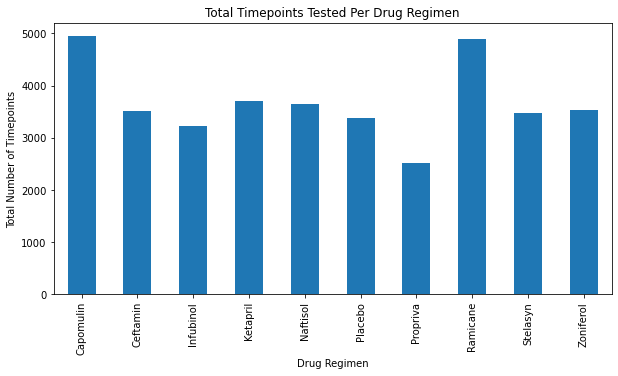

In [113]:
#### Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.
#filter df for just timepoint and drug regimen
regimen_time_point = mouse_data[["Timepoint", "Drug Regimen"]]

#determining the total number of timepoints

total_tp = regimen_time_point.groupby(["Drug Regimen"])["Timepoint"].sum()

#total_tp

#creating bar chart
total_tp.plot(kind = "bar", figsize = (10, 5))

# set title and label axes
plt.title("Total Timepoints Tested Per Drug Regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("Total Number of Timepoints")
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

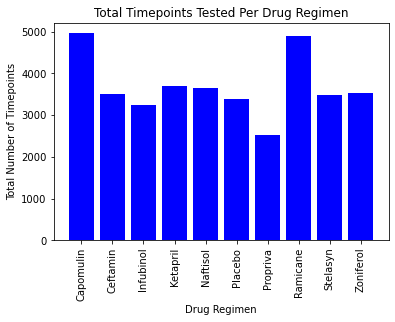

In [116]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.

#set x_axis 
x_axis = total_tp.index

#plot bar chart
plt.bar(x_axis, total_tp, color = "b", align = "center")

# set title and label axes
plt.title("Total Timepoints Tested Per Drug Regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("Total Number of Timepoints")

#rotate text to fit the chart
plt.xticks(rotation="vertical")

plt.show

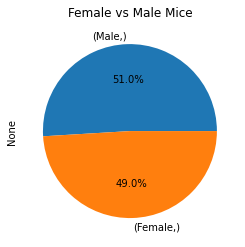

In [141]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
#filter mouse data via sex
mouse_mf = mouse_data[["Sex"]].value_counts()
# mouse_mf

#generate pie chart
mouse_mf.plot(kind = "pie", autopct = "%1.1f%%")
plt.title("Female vs Male Mice")
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

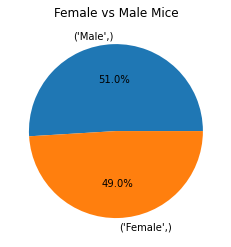

In [145]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
#generate pie chart
plt.pie(mouse_mf,labels = mouse_mf.index, autopct = "%1.1f%%")
plt.title("Female vs Male Mice")
plt.show

## Quartiles, Outliers and Boxplots

In [213]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse

tumor_dup = mouse_data.duplicated(subset =["Mouse ID"], keep="last")
# tumor_dup

# keeping the last timepoint
final_time = mouse_data.drop_duplicates(subset =["Mouse ID"], keep="last")
final_time

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
9,k403,Ramicane,Male,21,16,45,22.050126,1
19,s185,Capomulin,Female,3,17,45,23.343598,1
29,x401,Capomulin,Female,16,15,45,28.484033,0
39,m601,Capomulin,Male,22,17,45,28.430964,1
49,g791,Ramicane,Male,11,16,45,29.128472,1
...,...,...,...,...,...,...,...,...
1846,z314,Stelasyn,Female,21,28,5,45.934712,0
1849,z435,Propriva,Female,12,26,10,48.710661,0
1859,z581,Infubinol,Female,24,25,45,62.754451,3
1869,z795,Naftisol,Female,13,29,45,65.741070,3


In [214]:
#final time point for Capomulin
Capomulin_final = final_time.loc[final_time["Drug Regimen"] == "Capomulin", :]

Capomulin_final
# Merge this group df with the original dataframe to get the tumor volume at the last timepoint


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
19,s185,Capomulin,Female,3,17,45,23.343598,1
29,x401,Capomulin,Female,16,15,45,28.484033,0
39,m601,Capomulin,Male,22,17,45,28.430964,1
64,f966,Capomulin,Male,16,17,20,30.485985,0
104,u364,Capomulin,Male,18,17,45,31.023923,3
124,y793,Capomulin,Male,17,17,45,31.896238,2
134,r554,Capomulin,Female,8,17,45,32.377357,3
144,m957,Capomulin,Female,3,19,45,33.329098,1
164,t565,Capomulin,Female,20,17,45,34.455298,0
204,i738,Capomulin,Female,23,20,45,37.311846,2


In [215]:
#final time point for  Ramicane

Ramicane_final = final_time.loc[final_time["Drug Regimen"] == "Ramicane", :]
Ramicane_final

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
9,k403,Ramicane,Male,21,16,45,22.050126,1
49,g791,Ramicane,Male,11,16,45,29.128472,1
59,s508,Ramicane,Male,1,17,45,30.276232,0
74,m546,Ramicane,Male,18,16,45,30.564625,1
84,z578,Ramicane,Male,11,16,45,30.638696,0
94,j913,Ramicane,Female,4,17,45,31.560470,1
114,n364,Ramicane,Male,4,17,45,31.095335,1
154,c758,Ramicane,Male,9,17,45,33.397653,1
174,a644,Ramicane,Female,7,17,45,32.978522,1
184,i177,Ramicane,Male,10,18,45,33.562402,3


In [216]:
#final time point for Infubinol

Infubinol_final = final_time.loc[final_time["Drug Regimen"] == "Infubinol", :]
Infubinol_final

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
463,a203,Infubinol,Female,20,23,45,67.973419,2
473,a251,Infubinol,Female,21,25,45,65.525743,1
530,a577,Infubinol,Female,6,25,30,57.031862,2
540,a685,Infubinol,Male,8,30,45,66.083066,3
637,c139,Infubinol,Male,11,28,45,72.226731,2
669,c326,Infubinol,Female,18,25,5,36.321346,0
742,c895,Infubinol,Female,7,29,30,60.969711,2
800,e476,Infubinol,Male,23,26,45,62.435404,1
834,f345,Infubinol,Male,23,26,45,60.918767,1
936,i386,Infubinol,Female,23,29,40,67.289621,4


In [217]:
#final time point for Ceftamin

Ceftamin_final = final_time.loc[final_time["Drug Regimen"] == "Ceftamin", :]
Ceftamin_final

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
493,a275,Ceftamin,Female,20,28,45,62.999356,3
594,b447,Ceftamin,Male,2,30,0,45.000000,0
600,b487,Ceftamin,Female,6,28,25,56.057749,1
617,b759,Ceftamin,Female,12,25,30,55.742829,1
840,f436,Ceftamin,Female,3,25,15,48.722078,2
927,h531,Ceftamin,Male,5,27,5,47.784682,0
980,j296,Ceftamin,Female,24,30,45,61.849023,3
1020,k210,Ceftamin,Male,15,28,45,68.923185,3
1099,l471,Ceftamin,Female,7,28,45,67.748662,1
1106,l490,Ceftamin,Male,24,26,30,57.918381,3


In [239]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
final_tumor_vol =[]

# reg_index = final_time.set_index("Drug Regimen")
tumor_time = final_time.groupby(["Drug Regimen"]).agg('max')
                                                                  
# for loop

for each in treatments:
    final_tumor_vol.append(tumor_time)
   
    print(final_tumor_vol)

    
# Calculate the IQR and quantitatively determine if there are any potential outliers. 
# quartiles = final_tumor_vol["Tumor Volume (mm3)"].quantile([.25,.5,.75])
# lowerq = quartiles[0.25]
# upperq = quartiles[0.75]
# iqr = upperq-lowerq

# print(f"The lower quartile of occupancy is: {lowerq}")
# print(f"The upper quartile of occupancy is: {upperq}")
# print(f"The interquartile range of occupancy is: {iqr}")
# print(f"The the median of occupancy is: {quartiles[0.5]} ")

# lower_bound = lowerq - (1.5*iqr)
# upper_bound = upperq + (1.5*iqr)
# print(f"Values below {lower_bound} could be outliers.")
# print(f"Values above {upper_bound} could be outliers.")

# outlier_occupancy = final_tumor_vol.loc[(final_tumor_vol['each'] < lower_bound) | (final_tumor_vol['each'] > upper_bound)]
# outlier_occupancy
    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    
    
    # add subset 
    
    
    # Determine outliers using upper and lower bounds
# print(quartiles)



[             Mouse ID   Sex  Age_months  Weight (g)  Timepoint  \
Drug Regimen                                                     
Capomulin        y793  Male          24          25         45   
Ceftamin         y865  Male          24          30         45   
Infubinol        z581  Male          24          30         45   
Ketapril         y260  Male          24          30         45   
Naftisol         z969  Male          23          30         45   
Placebo          y478  Male          21          30         45   
Propriva         z435  Male          24          30         45   
Ramicane         z578  Male          23          25         45   
Stelasyn         z314  Male          23          30         45   
Zoniferol        x613  Male          24          30         45   

              Tumor Volume (mm3)  Metastatic Sites  
Drug Regimen                                        
Capomulin              47.685963                 3  
Ceftamin               68.923185               

In [ ]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest


## Line and Scatter Plots

In [ ]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin


In [ ]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen


## Correlation and Regression

In [ ]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
